In [1]:
import re
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

sys.path.insert(0, '../')

from src import GlobularCluster
from src.plot import LogNorm, AsinhNorm
from src.utils import profile_binning, clip_quantile_nd
from src.cluster import DBSCAN_Clustering

%load_ext autoreload
%autoreload 2

## Example 1 :Tuc 47

In [2]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_104_47Tuc"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

,x,y,pmx,pmy,pmx_e,pmy_e,pm_corr,g_mag,bp_rp,filter,memberprob,r,pm
count,90493.000000,90493.000000,90493.000000,90493.000000,90493.000000,90493.000000,90493.000000,90493.000000,72818.000000,90493.000000,90493.000000,90493.000000,90493.000000
mean,0.000156,-0.001003,5.069834,-2.391010,0.748230,0.620638,-0.075671,18.663277,0.902223,0.186291,0.172318,0.155831,5.962009
std,0.120260,0.120338,2.228220,1.715258,0.696715,0.602957,0.200438,1.435548,0.197522,0.389343,0.374415,0.068273,1.944638
min,-0.304802,-0.304871,-18.609150,-18.942380,0.023578,0.020528,-0.951285,10.600150,-1.243570,0.000000,0.000000,0.001046,0.014232
25%,-0.086928,-0.088950,4.563601,-2.982478,0.282561,0.232241,-0.184336,17.860400,0.791438,0.000000,0.000000,0.102253,5.270765
50%,-0.000863,-0.000408,5.225497,-2.455140,0.526232,0.425090,-0.070902,18.809510,0.873425,0.000000,0.000000,0.147533,5.875586
75%,0.087354,0.086612,5.831917,-1.870965,0.970185,0.772030,0.027872,19.691000,0.998234,0.000000,0.000000,0.206166,6.498322
max,0.304218,0.304813,19.767390,19.388680,5.227345,5.189505,0.982183,20.999230,4.339368,1.000000,0.998725,0.304992,19.986477


Text(0, 0.5, 'Y')

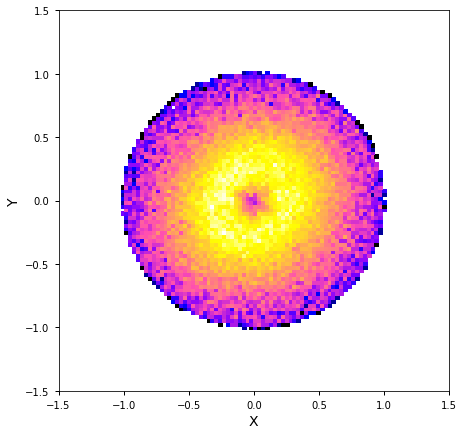

In [3]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0.5, 0, 'R')

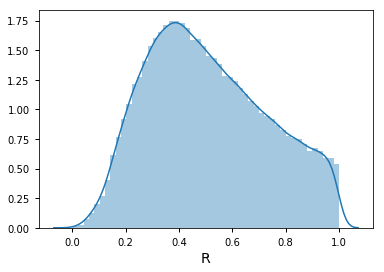

In [4]:
sns.distplot(GC.r)
plt.xlabel("R")

Text(0, 0.5, 'PMY')

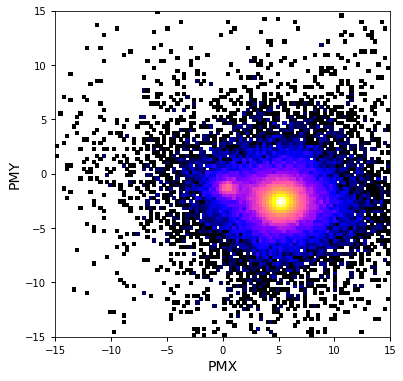

In [5]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-15,15]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0, 0.5, 'PM')

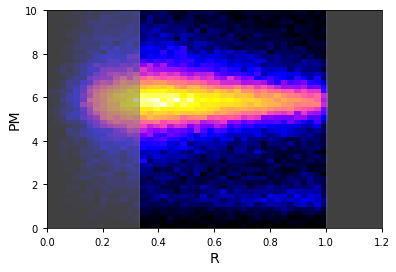

In [6]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,10]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [7]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [8]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.5

Clustering using HDBSCAN
Clustering Finished: 2 components


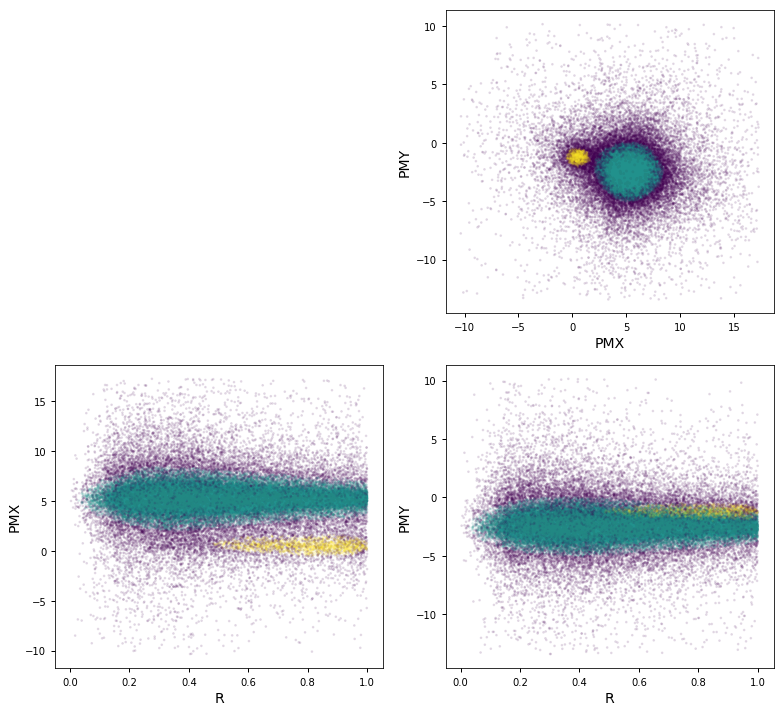

In [9]:
clus.plot_clustering()

In [10]:
is_mp = clus.predict_main_pop()

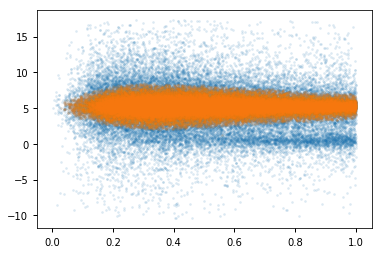

In [11]:
plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

## Example 2 : M22

In [22]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6656_M_22"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

,x,y,pmx,pmy,pmx_e,pmy_e,pm_corr,g_mag,bp_rp,filter,memberprob,r,pm
count,47623.000000,47623.000000,47623.000000,47623.000000,47623.000000,47623.000000,47623.000000,47623.000000,37040.000000,47623.000000,47623.000000,47623.000000,47623.000000
mean,-0.002619,-0.004949,3.414474,-5.013415,0.748493,0.717589,0.372281,18.164009,1.209709,0.164983,0.060532,0.127329,8.435107
std,0.095553,0.096407,6.364389,2.633292,0.612187,0.641724,0.344081,1.339957,0.280665,0.371169,0.238410,0.047363,3.616752
min,-0.196771,-0.197072,-17.315500,-19.999060,0.043089,0.037289,-0.990095,10.087950,-0.920038,0.000000,0.000000,0.001267,0.050936
25%,-0.078152,-0.081533,-2.292094,-6.246602,0.321165,0.283403,0.144950,17.587630,1.064172,0.000000,0.000000,0.091087,5.402609
50%,-0.003261,-0.006336,1.964141,-5.364388,0.522529,0.456579,0.359409,18.479710,1.186968,0.000000,0.000000,0.134060,9.401840
75%,0.071724,0.069378,9.745759,-3.929982,1.052025,0.926907,0.641265,19.044655,1.343052,0.000000,0.000000,0.167852,11.373938
max,0.197038,0.196861,19.486540,15.207570,4.228534,3.993939,0.988919,20.734310,5.266831,1.000000,1.000000,0.197333,19.999351


Text(0, 0.5, 'Y')

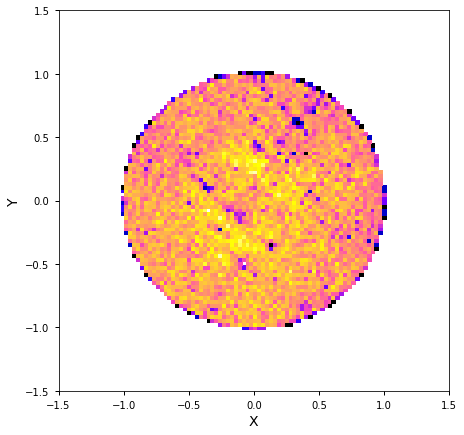

In [23]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'PMY')

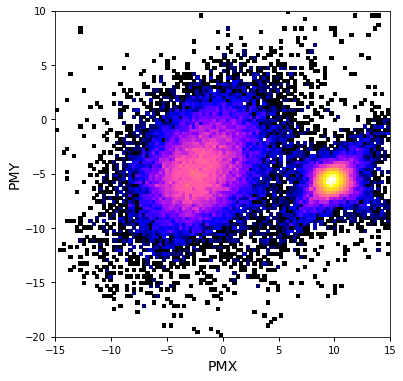

In [24]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0, 0.5, 'PM')

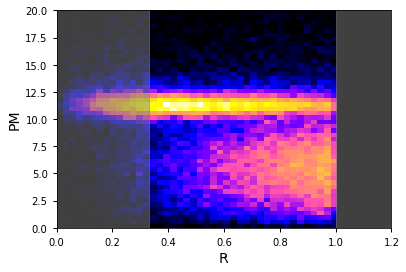

In [25]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,20]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [26]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [27]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.3

Clustering using HDBSCAN
Clustering Finished: 2 components


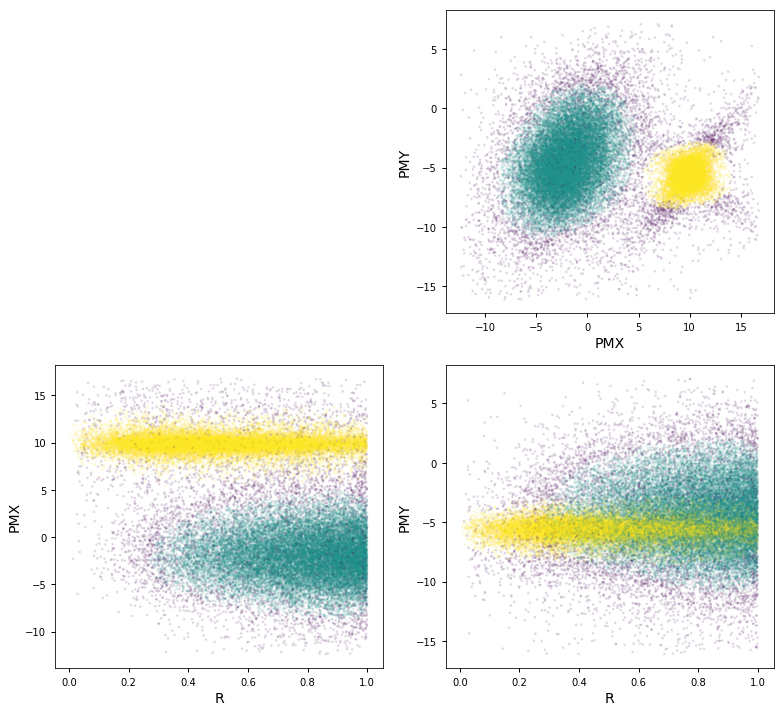

In [28]:
clus.plot_clustering()

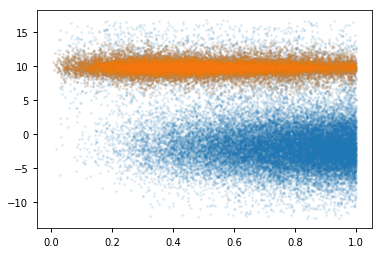

In [29]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

## Example 2 : M71

In [2]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6838_M_71"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

,x,y,pmx,pmy,pmx_e,pmy_e,pm_corr,g_mag,bp_rp,filter,memberprob,r,pm
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,9204.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,0.000738,-0.000545,-3.002906,-3.712092,0.671085,0.737524,0.158635,18.939338,1.166352,0.272480,0.136847,0.049705,5.298559
std,0.038306,0.038558,1.878395,2.580020,0.622469,0.730675,0.182805,1.345430,0.251820,0.445253,0.331516,0.022002,2.215128
min,-0.084836,-0.084869,-18.380810,-19.884020,0.023626,0.024443,-0.905608,11.273100,-0.862921,0.000000,0.000000,0.000298,0.167173
25%,-0.027477,-0.028487,-3.723867,-5.081571,0.235263,0.246856,0.093072,18.184465,1.046352,0.000000,0.000000,0.031842,4.080553
50%,0.000932,-0.000233,-3.250705,-3.038324,0.458292,0.477064,0.160591,19.085745,1.138705,0.000000,0.000000,0.051259,4.613320
75%,0.028622,0.027386,-2.344428,-2.424019,0.912190,0.979679,0.234060,19.955955,1.274906,1.000000,0.000000,0.068825,6.223382
max,0.084824,0.084879,15.726740,19.410010,4.498508,4.844886,0.878718,20.995770,3.110374,1.000000,0.998502,0.084988,19.939969


Text(0, 0.5, 'Y')

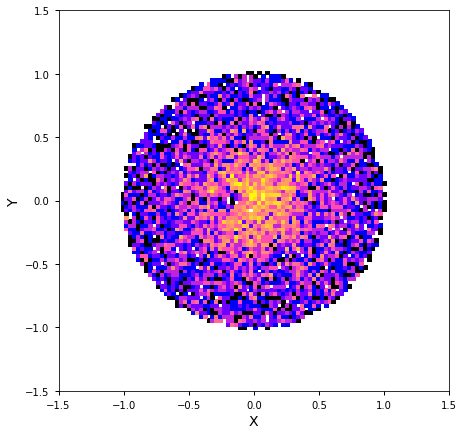

In [3]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'PMY')

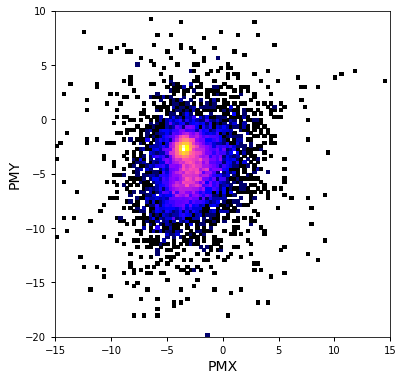

In [4]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0, 0.5, 'PM')

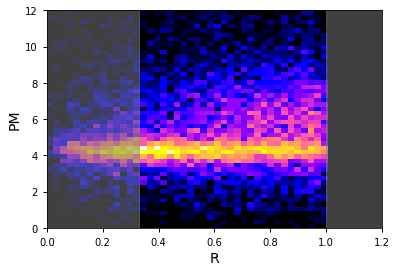

In [5]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,12]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [6]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [16]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # DBSCAN : eps = 0.3

Clustering using HDBSCAN
Clustering Finished: 0 components
Noisy data. Be caution.


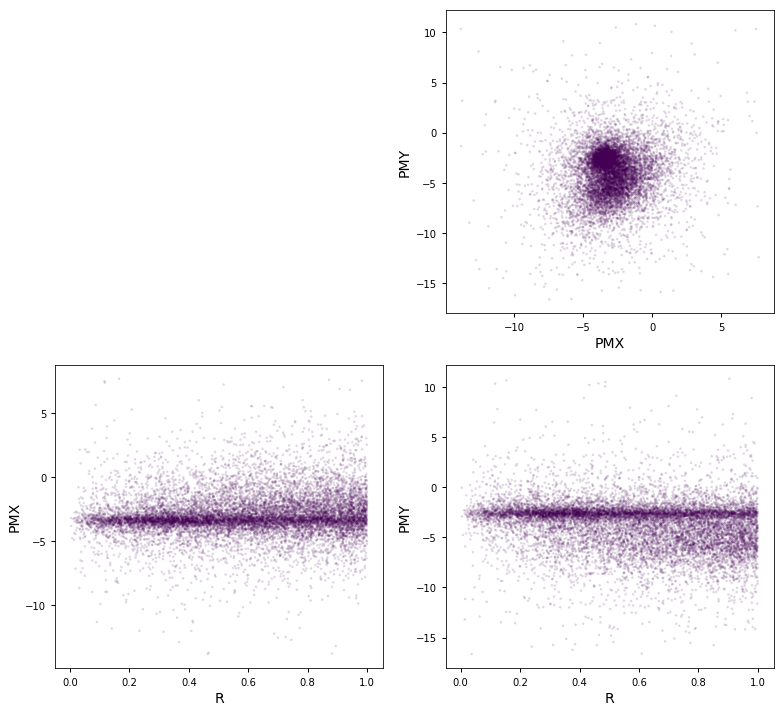

In [17]:
clus.plot_clustering()

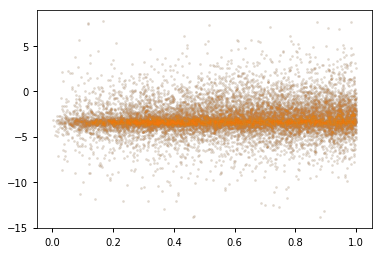

In [18]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)